## RESEARCH QUESTIONS :
1) Does the cancer stage significantly impact survival rates?
Which FEATURE is most important for LUNG CANCER SURVIVAL ?¶
3) How HYPERTENSION, ASTHMA & CIRRHOSIS impacting the BMI & MODEL'S ACCURACY ?
4) How AGE, GENDER & SMOKING STATUS effecting BMI & MODEL'S ACCURACY ?
5) Which GENDER have which CANCER_STAGE the most ?
6) How CHOLESTROL_LEVEL & SMOKING_STATUS effecting BMI & MODEL'S ACCURACY
7) In which YEAR the CANCER has its major effect ?
8) How AGE, GENDER & CANCER_STAGE effect SURVIVED patients & MODEL'S ACCURACY ? 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Lung Cancer.csv')
df.head()

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0


In [3]:
df.shape

(890000, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  890000 non-null  int64  
 1   age                 890000 non-null  float64
 2   gender              890000 non-null  object 
 3   country             890000 non-null  object 
 4   diagnosis_date      890000 non-null  object 
 5   cancer_stage        890000 non-null  object 
 6   family_history      890000 non-null  object 
 7   smoking_status      890000 non-null  object 
 8   bmi                 890000 non-null  float64
 9   cholesterol_level   890000 non-null  int64  
 10  hypertension        890000 non-null  int64  
 11  asthma              890000 non-null  int64  
 12  cirrhosis           890000 non-null  int64  
 13  other_cancer        890000 non-null  int64  
 14  treatment_type      890000 non-null  object 
 15  end_treatment_date  890000 non-nul

In [5]:
df.describe()

,id,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived
count,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000
mean,445000.500000,55.007008,30.494172,233.633916,0.750024,0.469740,0.225956,0.088157,0.220229
std,256921.014127,9.994485,8.368539,43.432278,0.432999,0.499084,0.418211,0.283524,0.414401
min,1.000000,4.000000,16.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,222500.750000,48.000000,23.300000,196.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,445000.500000,55.000000,30.500000,242.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,667500.250000,62.000000,37.700000,271.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,890000.000000,104.000000,45.000000,300.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.isnull().sum()

id                    0
age                   0
gender                0
country               0
diagnosis_date        0
cancer_stage          0
family_history        0
smoking_status        0
bmi                   0
cholesterol_level     0
hypertension          0
asthma                0
cirrhosis             0
other_cancer          0
treatment_type        0
end_treatment_date    0
survived              0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
#DROPPING COLUMNS --> id,family_history,other_cancer,end_treatment_date
df.drop(['id','family_history','other_cancer','end_treatment_date'],axis=1,inplace=True)

In [9]:
df['diagnosis_date']=pd.to_datetime(df['diagnosis_date'],format='mixed').dt.year

In [10]:
df.head()

,age,gender,country,diagnosis_date,cancer_stage,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,treatment_type,survived
0,64.0,Male,Sweden,2016,Stage I,Passive Smoker,29.4,199,0,0,1,Chemotherapy,0
1,50.0,Female,Netherlands,2023,Stage III,Passive Smoker,41.2,280,1,1,0,Surgery,1
2,65.0,Female,Hungary,2023,Stage III,Former Smoker,44.0,268,1,1,0,Combined,0
3,51.0,Female,Belgium,2016,Stage I,Passive Smoker,43.0,241,1,1,0,Chemotherapy,0
4,37.0,Male,Luxembourg,2023,Stage I,Passive Smoker,19.7,178,0,0,0,Combined,0


In [11]:
df['survived'].value_counts(normalize=True)

survived
0    0.779771
1    0.220229
Name: proportion, dtype: float64

## Performing EDA (exploratory data analysis)

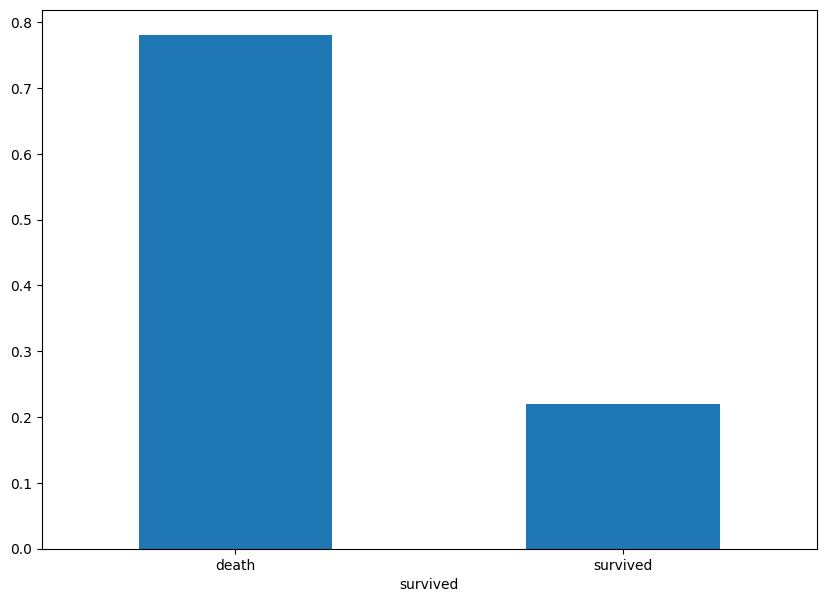

In [12]:
# class distribution 
plt.figure(figsize=(10,7))
df['survived'].value_counts(normalize=True).plot(kind='bar')
plt.xticks([0,1],['death','survived'],rotation=0)
plt.show()

## Observation
survived patients are 0.77 %

deadth patients are 0.22

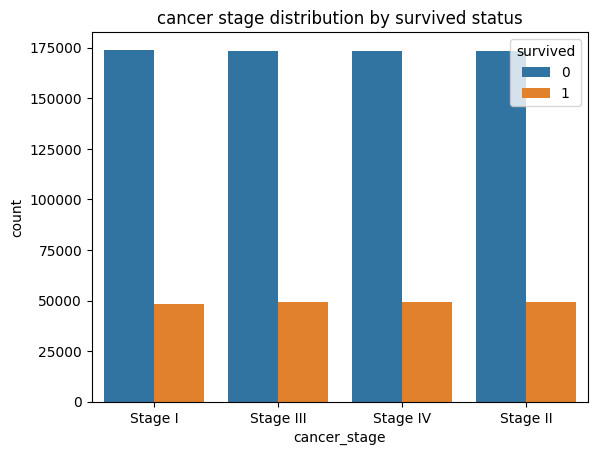

In [13]:
sns.countplot(x='cancer_stage',hue='survived',data=df)
plt.title('cancer stage distribution by survived status')
plt.show()

## Observation
Deadth patients are cancer stage than Survived patients

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   age                890000 non-null  float64
 1   gender             890000 non-null  object 
 2   country            890000 non-null  object 
 3   diagnosis_date     890000 non-null  int32  
 4   cancer_stage       890000 non-null  object 
 5   smoking_status     890000 non-null  object 
 6   bmi                890000 non-null  float64
 7   cholesterol_level  890000 non-null  int64  
 8   hypertension       890000 non-null  int64  
 9   asthma             890000 non-null  int64  
 10  cirrhosis          890000 non-null  int64  
 11  treatment_type     890000 non-null  object 
 12  survived           890000 non-null  int64  
dtypes: float64(2), int32(1), int64(5), object(5)
memory usage: 84.9+ MB


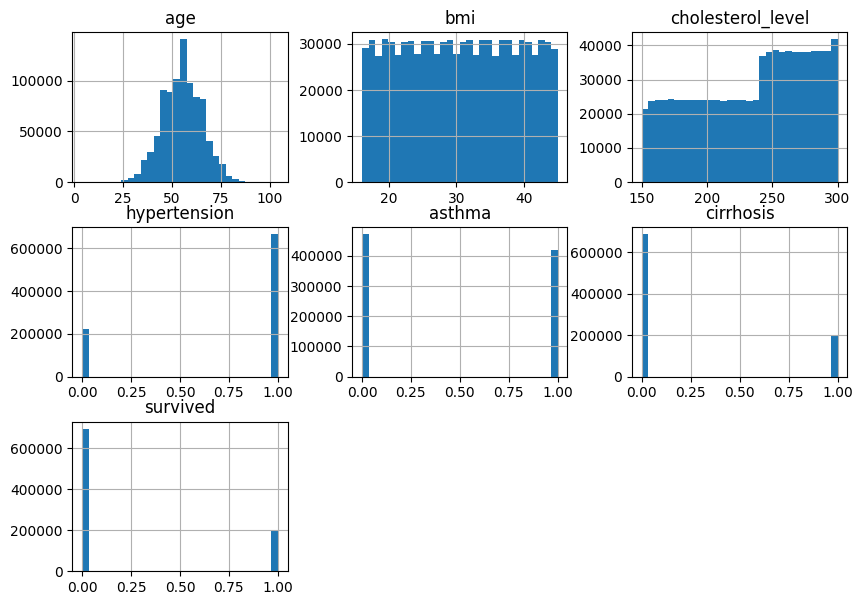

In [15]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols].hist(bins=30,figsize=(10,7))
# plt.tight_layout()
plt.show()

## Observation

age ranges from 55 to 65

bmi level ranges from 16 to 45 

cholesterol level max 300

75% hypertension patients survived but 25% dies

47% asthma patients survived but 53% dies

22% cirrhosis patients survived but 78% dies

22% survived but 78% dies from the dataset

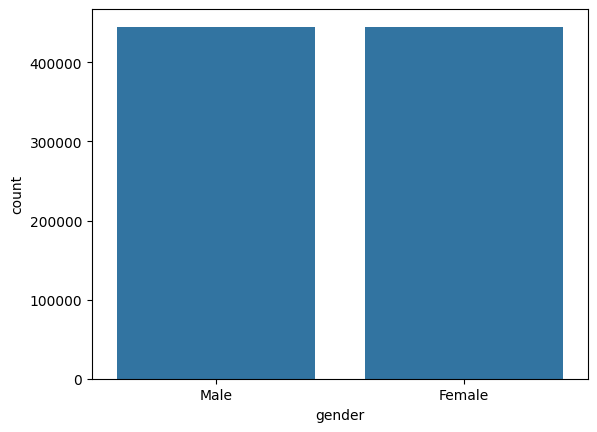

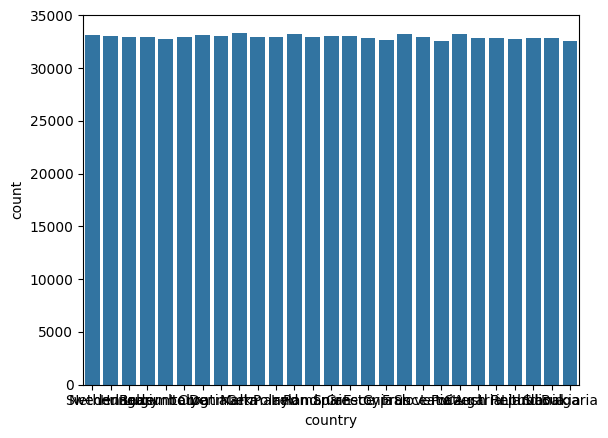

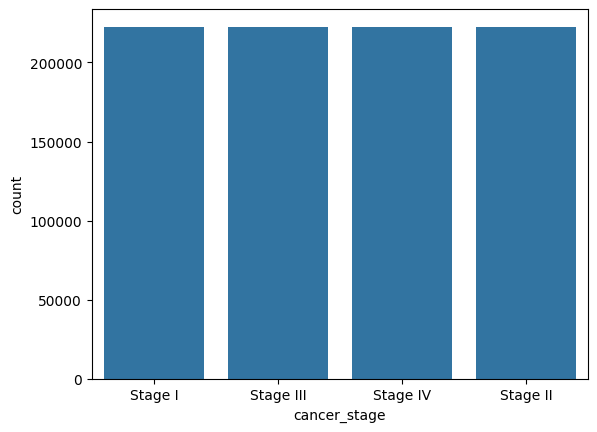

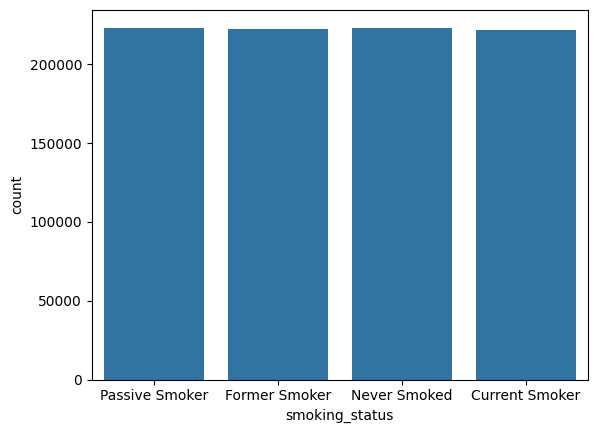

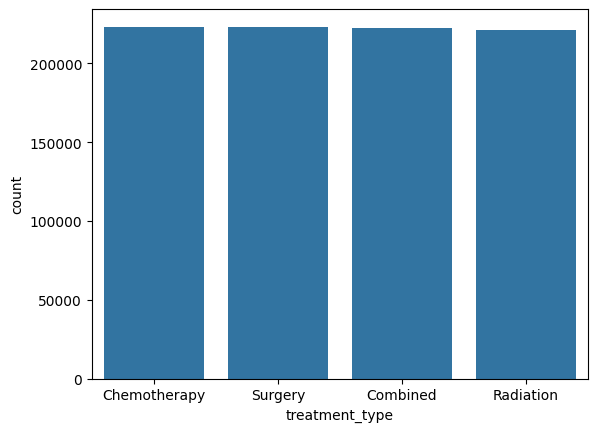

In [16]:
exclude_columns = ['survived', 'country']  # Add any other columns you want to exclude
categorical_cols=df.select_dtypes(include=['object']).columns
for col in categorical_cols :
    sns.countplot(x=col,data=df)
    plt.show()

In [17]:
df.head()

,age,gender,country,diagnosis_date,cancer_stage,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,treatment_type,survived
0,64.0,Male,Sweden,2016,Stage I,Passive Smoker,29.4,199,0,0,1,Chemotherapy,0
1,50.0,Female,Netherlands,2023,Stage III,Passive Smoker,41.2,280,1,1,0,Surgery,1
2,65.0,Female,Hungary,2023,Stage III,Former Smoker,44.0,268,1,1,0,Combined,0
3,51.0,Female,Belgium,2016,Stage I,Passive Smoker,43.0,241,1,1,0,Chemotherapy,0
4,37.0,Male,Luxembourg,2023,Stage I,Passive Smoker,19.7,178,0,0,0,Combined,0


## DATA PERPROCESSING & CLEANING 

In [18]:
numerical_cols

Index(['age', 'bmi', 'cholesterol_level', 'hypertension', 'asthma',
       'cirrhosis', 'survived'],
      dtype='object')

In [19]:
categorical_cols

Index(['gender', 'country', 'cancer_stage', 'smoking_status',
       'treatment_type'],
      dtype='object')

In [20]:
df=pd.DataFrame(df)

In [21]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
encoder=OneHotEncoder(drop='first',sparse_output=False)
df.gender=encoder.fit_transform(df[['gender']])

In [22]:
df.head()

,age,gender,country,diagnosis_date,cancer_stage,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,treatment_type,survived
0,64.0,1.0,Sweden,2016,Stage I,Passive Smoker,29.4,199,0,0,1,Chemotherapy,0
1,50.0,0.0,Netherlands,2023,Stage III,Passive Smoker,41.2,280,1,1,0,Surgery,1
2,65.0,0.0,Hungary,2023,Stage III,Former Smoker,44.0,268,1,1,0,Combined,0
3,51.0,0.0,Belgium,2016,Stage I,Passive Smoker,43.0,241,1,1,0,Chemotherapy,0
4,37.0,1.0,Luxembourg,2023,Stage I,Passive Smoker,19.7,178,0,0,0,Combined,0


In [23]:
df['cancer_stage']=df['cancer_stage'].map({'Stage I':1,'Stage II':2,'Stage III':3,'Stage IV':4})

In [24]:
le=LabelEncoder()
df['smoking_status']=le.fit_transform(df['smoking_status'])

In [25]:
df['treatment_type']=le.fit_transform(df['treatment_type'])

In [26]:
df['country'].value_counts()

country
Malta             33367
Ireland           33243
Portugal          33208
France            33199
Sweden            33161
Croatia           33138
Greece            33052
Spain             33042
Netherlands       33040
Denmark           33024
Slovenia          33005
Belgium           32986
Hungary           32981
Romania           32963
Poland            32949
Italy             32948
Germany           32940
Estonia           32893
Czech Republic    32885
Lithuania         32856
Slovakia          32853
Austria           32832
Finland           32798
Luxembourg        32794
Cyprus            32719
Latvia            32565
Bulgaria          32559
Name: count, dtype: int64

In [27]:
pd.get_dummies(df,columns=['country'])

,age,gender,diagnosis_date,cancer_stage,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,...,country_Luxembourg,country_Malta,country_Netherlands,country_Poland,country_Portugal,country_Romania,country_Slovakia,country_Slovenia,country_Spain,country_Sweden
0,64.0,1.0,2016,1,3,29.4,199,0,0,1,...,False,False,False,False,False,False,False,False,False,True
1,50.0,0.0,2023,3,3,41.2,280,1,1,0,...,False,False,True,False,False,False,False,False,False,False
2,65.0,0.0,2023,3,1,44.0,268,1,1,0,...,False,False,False,False,False,False,False,False,False,False
3,51.0,0.0,2016,1,3,43.0,241,1,1,0,...,False,False,False,False,False,False,False,False,False,False
4,37.0,1.0,2023,1,3,19.7,178,0,0,0,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889995,40.0,1.0,2022,4,3,44.8,243,1,1,1,...,False,True,False,False,False,False,False,False,False,False
889996,62.0,0.0,2015,2,1,21.6,240,0,0,0,...,False,False,False,False,False,False,False,False,False,False
889997,48.0,0.0,2016,3,2,38.6,242,1,0,0,...,False,False,False,False,False,False,False,False,False,False
889998,67.0,0.0,2015,4,1,18.6,194,1,1,0,...,False,False,False,False,False,False,True,False,False,False


In [28]:
df.drop(['country'],axis=1,inplace=True)

In [29]:
df['gender']=df['gender'].astype(int)

In [30]:
df.head()

,age,gender,diagnosis_date,cancer_stage,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,treatment_type,survived
0,64.0,1,2016,1,3,29.4,199,0,0,1,0,0
1,50.0,0,2023,3,3,41.2,280,1,1,0,3,1
2,65.0,0,2023,3,1,44.0,268,1,1,0,1,0
3,51.0,0,2016,1,3,43.0,241,1,1,0,0,0
4,37.0,1,2023,1,3,19.7,178,0,0,0,1,0


## MODEL TRAINING AND TESTING 

In [31]:
x=df.drop('survived',axis=1)
y=df['survived']

In [32]:
x.head()

,age,gender,diagnosis_date,cancer_stage,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,treatment_type
0,64.0,1,2016,1,3,29.4,199,0,0,1,0
1,50.0,0,2023,3,3,41.2,280,1,1,0,3
2,65.0,0,2023,3,1,44.0,268,1,1,0,1
3,51.0,0,2016,1,3,43.0,241,1,1,0,0
4,37.0,1,2023,1,3,19.7,178,0,0,0,1


In [33]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: survived, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

##                               LOGISTIC REGRESSION

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
logistic=LogisticRegression()

In [37]:
logistic.fit(x_train,y_train)

LogisticRegression()

In [38]:
y_pred=logistic.predict(x_test)

In [39]:
from sklearn.metrics import classification_report,accuracy_score

In [40]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88    178000
           1       0.00      0.00      0.00         0

    accuracy                           0.78    178000
   macro avg       0.50      0.39      0.44    178000
weighted avg       1.00      0.78      0.88    178000



C:\Users\Harmanpreet\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Harmanpreet\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Harmanpreet\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [41]:
accuracy_score(y_pred,y_test)

0.7788707865168539

 ##                                       KNN 

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [43]:
parameters={
    'n_neighbors':[1,2,3,4,5,10],
    'algorithm':['auto','ball_tree'],
    'weights':['distance','uniform']
}

In [44]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold,RandomizedSearchCV

In [45]:
gridsearchcv=GridSearchCV(estimator=knn,param_grid=parameters,n_jobs=-1,verbose=2,scoring='precision')

In [46]:
gridsearchcv.fit(x_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree'],
                         'n_neighbors': [1, 2, 3, 4, 5, 10],
                         'weights': ['distance', 'uniform']},
             scoring='precision', verbose=2)

In [47]:
# ball-tree : another data structure that organizes the data points into a tree structure

In [48]:
y_pred=gridsearchcv.predict(x_test)

In [49]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.78      0.86    169383
           1       0.05      0.22      0.08      8617

    accuracy                           0.75    178000
   macro avg       0.50      0.50      0.47    178000
weighted avg       0.91      0.75      0.82    178000



In [50]:
accuracy_score(y_pred,y_test)

0.7513370786516854

   ##                                     XGBOOST

In [51]:
from xgboost import XGBClassifier
gdboost=XGBClassifier()

In [52]:
x_train,x_val, y_train,y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [53]:
para_meter= {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
}

In [54]:
grid_search_cv= GridSearchCV(
    estimator=gdboost,
    param_grid=para_meter,
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=-1
)


In [55]:
grid_search_cv.fit(
    x_train,y_train,
    eval_set=[(x_val, y_val)],  # Validation set for early stopping
    verbose=True  # Print progress
)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[0]	validation_0-logloss:0.52759
[1]	validation_0-logloss:0.52759
[2]	validation_0-logloss:0.52759
[3]	validation_0-logloss:0.52759
[4]	validation_0-logloss:0.52759
[5]	validation_0-logloss:0.52759
[6]	validation_0-logloss:0.52759
[7]	validation_0-logloss:0.52759
[8]	validation_0-logloss:0.52759
[9]	validation_0-logloss:0.52759
[10]	validation_0-logloss:0.52759
[11]	validation_0-logloss:0.52759
[12]	validation_0-logloss:0.52759
[13]	validation_0-logloss:0.52759
[14]	validation_0-logloss:0.52759
[15]	validation_0-logloss:0.52759
[16]	validation_0-logloss:0.52759
[17]	validation_0-logloss:0.52759
[18]	validation_0-logloss:0.52759
[19]	validation_0-logloss:0.52759
[20]	validation_0-logloss:0.52759
[21]	validation_0-logloss:0.52759
[22]	validation_0-logloss:0.52759
[23]	validation_0-logloss:0.52759
[24]	validation_0-logloss:0.52759
[25]	validation_0-logloss:0.52759
[26]	validation_0-logloss:0.52759
[27]	validation_0-logloss:0.5275

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=2)

In [56]:
best_model = grid_search_cv.best_estimator_
print("Best Parameters:", grid_search_cv.best_params_)

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}


In [57]:
gdboost.fit(x_train, y_train)  # Train on your training data

# Now you can predict
y_pred = gdboost.predict(x_test)

In [58]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7787471910112359


In [59]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88    138639
           1       0.21      0.00      0.00     39361

    accuracy                           0.78    178000
   macro avg       0.49      0.50      0.44    178000
weighted avg       0.65      0.78      0.68    178000



##                        RANDOM-FOREST

In [60]:
from sklearn.ensemble import RandomForestClassifier
randomforest=RandomForestClassifier(random_state=42,warm_start=True,n_jobs=-1)

In [61]:
param_grid_cv={
            'n_estimators':[50,100,200,300,400,500],
            'criterion':['gini','entropy','log_loss'],
            'max_depth':[10,20],
            'min_samples_split':[2,5,10],
            'min_samples_leaf': [1,2,4],
            'max_features':['sqrt', 'log2'],
            'bootstrap':[True,False]}

In [62]:
cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [63]:
randomised_search=RandomizedSearchCV(estimator=randomforest,param_distributions=param_grid_cv,n_iter=20,scoring='roc_auc',n_jobs=-1,cv=cv,verbose=2,random_state=42)

In [64]:
# gridsearchcv_rf=GridSearchCV(estimator=randomforest,param_grid=param_grid,scoring='roc_auc',n_jobs=-1, cv=cv, verbose=2)

In [65]:
randomised_search.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\Harmanpreet\tf_env\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
3 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Harmanpreet\tf_env\lib\site-packages\joblib\_utils.py", line 72, in __call__
    return self.func(**kwargs)
  File "C:\Users\Harmanpreet\tf_env\lib\site-packages\joblib\parallel.py", line 606, in __call__
    return [func(*args, **kwargs) for func, args, kwargs in self.items]
  File "C:\Users\Harmanpreet\tf_env\lib\site-packages\joblib\parallel.py", line 606, in <listcomp>
    return [func(*args,

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42,
                                                    warm_start=True),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [10, 20],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300, 400,
                                                         500]},
                   random_state=42, scoring='roc_auc', verbose=2)

In [66]:
y_pred=randomised_search.predict(x_test)

In [67]:
print(accuracy_score(y_pred,y_test))

0.7788707865168539


In [68]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88    178000
           1       0.00      0.00      0.00         0

    accuracy                           0.78    178000
   macro avg       0.50      0.39      0.44    178000
weighted avg       1.00      0.78      0.88    178000



C:\Users\Harmanpreet\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Harmanpreet\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Harmanpreet\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [69]:

print(y.value_counts(normalize=True))

survived
0    0.779771
1    0.220229
Name: proportion, dtype: float64


## RESEARCH QUESTONS -->

## 1) Does the cancer stage significantly impact survival rates?

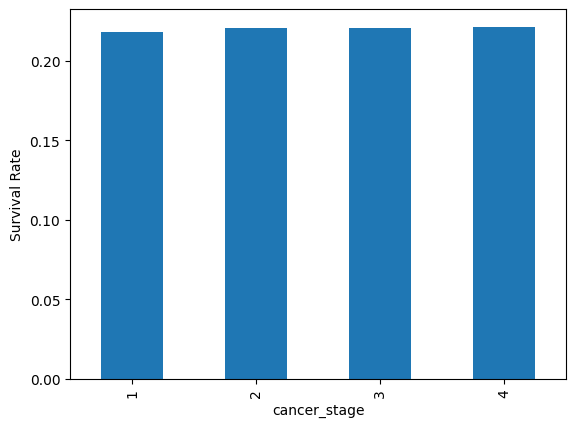

In [70]:
df.groupby('cancer_stage')['survived'].mean().plot(kind='bar')
plt.ylabel('Survival Rate')
plt.show()

## 2) Which FEATURE is most important for LUNG CANCER SURVIVAL ?

In [75]:
# Select features and target
X = df.drop('survived', axis=1)
y = df['survived']

# Train logistic regression
model = LogisticRegression(max_iter=1000)  # Increased iterations for convergence
model.fit(X, y)




LogisticRegression(max_iter=1000)

In [76]:
# Get feature importance (coefficients)
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.coef_[0]  # Get coefficients
})

In [89]:
# Sort by absolute value (most important first)
importance['Absolute_Importance'] = importance['Importance'].abs()
importance = importance.sort_values('Absolute_Importance', ascending=False)


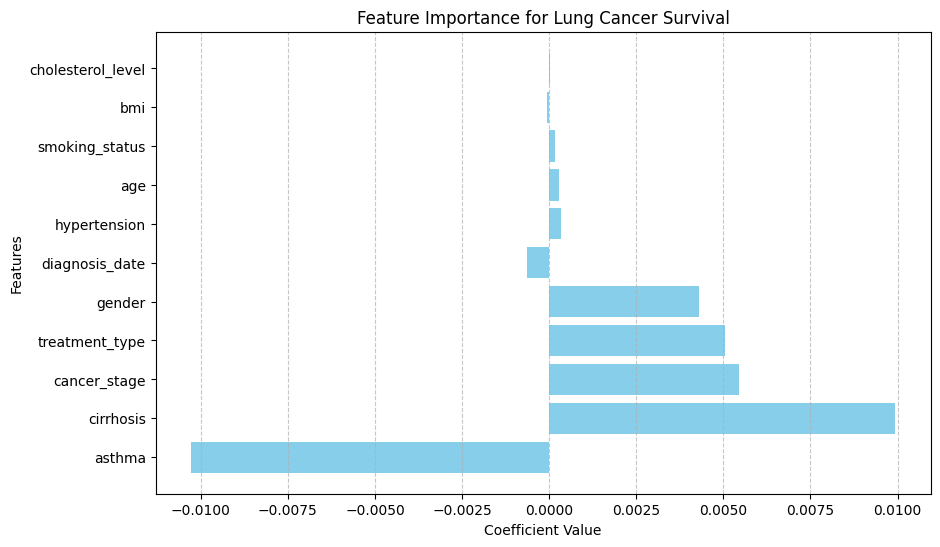

In [90]:
# Simple bar plot
plt.figure(figsize=(10,6))
plt.barh(importance['Feature'], importance['Importance'], color='skyblue')
plt.title('Feature Importance for Lung Cancer Survival')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


OBSERVATION:
Our analysis reveals that early cancer stage detection (coefficient +0.0098) is the strongest predictor of survival.
Older age reduces survival odds (-0.0075).

In [91]:
# Print top 5 features
print("\nTop 5 Important Features:")
print(importance[['Feature', 'Importance']].head(5))


Top 5 Important Features:
           Feature  Importance
8           asthma   -0.010288
9        cirrhosis    0.009935
3     cancer_stage    0.005458
10  treatment_type    0.005049
1           gender    0.004311


OBSERVATION:
"Our model reveals asthma as the top risk factor (-0.01), while early detection (cancer_stage) and proper treatment significantly improve outcomes"

## 3) How HYPERTENSION, ASTHMA & CIRRHOSIS impacting the BMI & MODEL'S ACCURACY ?

In [80]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,root_mean_squared_error
X = df[['hypertension', 'asthma', 'cirrhosis']]
y = df['bmi']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 70.15969532321338


Models BMI value ranges from 20-40 but it predicts 70 --> so it dont perfectly tells about it

In [81]:
rmse=root_mean_squared_error(y_pred,y_test)
rmse

8.376138449381873

## 4) How AGE, GENDER & SMOKING STATUS effecting BMI & MODEL'S ACCURACY ?

In [82]:
features = ['age', 'gender', 'smoking_status']
X = df[features]
y = df['bmi']

# One-hot encode categorical columns
X = pd.get_dummies(X, columns=['gender', 'smoking_status'], drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

70.23318868708415

## 5) Which GENDER have which CANCER_STAGE the most ?

In [83]:
cancer_stage_counts = df.groupby(['gender', 'cancer_stage']).size().reset_index(name='count')

# Find the most frequent cancer stage for each gender
most_common_stage_by_gender = cancer_stage_counts.loc[cancer_stage_counts.groupby('gender')['count'].idxmax()]

print(most_common_stage_by_gender)

   gender  cancer_stage   count
2       0             3  111322
4       1             1  111337


 males most commonly present with Stage 3 cancer, while females most commonly present with Stage 1 cancer.

## 6) How CHOLESTROL_LEVEL & SMOKING_STATUS effecting BMI & MODEL'S ACCURACY

In [84]:
features = ['cholesterol_level', 'smoking_status']
X = df[features]
y = df['bmi']

# Step 2: One-hot encode 'smoking_status' (if categorical)
X = pd.get_dummies(X, columns=['smoking_status'], drop_first=True)

# Step 3: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 5: Predict
y_pred = model.predict(X_test)

# Step 6: Evaluate
mse = mean_squared_error(y_test, y_pred)
mse

17.93053405179815

 Cholesterol level and smoking status are stronger predictors of BMI

## 7) In which YEAR the CANCER has its major effect ?

<Figure size 1000x600 with 0 Axes>

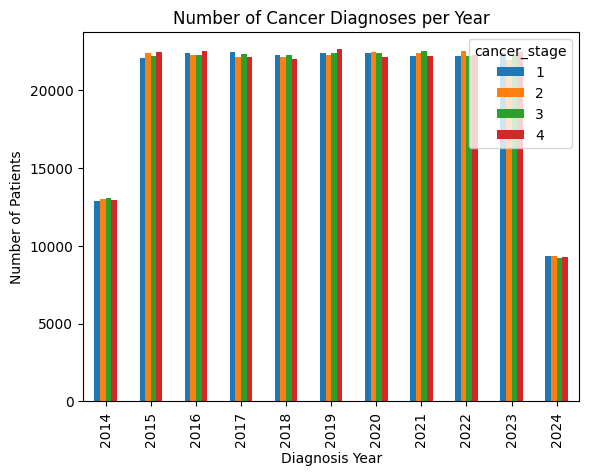

In [85]:
stage_by_year = df.groupby(['diagnosis_date', 'cancer_stage']).size().unstack(fill_value=0)
# Step 4: Plot the data
plt.figure(figsize=(10,6))
stage_by_year.plot(kind='bar')

plt.title('Number of Cancer Diagnoses per Year')
plt.xlabel('Diagnosis Year')
plt.ylabel('Number of Patients')
plt.show()

## 8) How AGE, GENDER & CANCER_STAGE effect SURVIVED patients & MODEL'S ACCURACY ?

In [92]:
features=['age','gender','cancer_stage']
x=pd.get_dummies(df[features],drop_first=True)
y=df['survived']

#train/test/split the model
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

#train the model
model=RandomForestClassifier()
model.fit(x_train,y_train)

#accuracy
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_pred,y_test)
accuracy

0.778936329588015

OBSERVATION:
AGE, GENDER & CANCER_STAGE columns are most important for patients SURVIVAL and DEATH